# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from tensorflow.keras import utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

# 建立模型

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#建立模型

In [9]:
#宣告採用序列模型
model = Sequential()

In [10]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [11]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 105us/sample - loss: 0.2360 - accuracy: 0.9302 - val_loss: 0.1220 - val_accuracy: 0.9615
Epoch 2/10
48000/48000 [==============================] - 5s 96us/sample - loss: 0.0955 - accuracy: 0.9702 - val_loss: 0.1086 - val_accuracy: 0.9678
Epoch 3/10
48000/48000 [==============================] - 5s 98us/sample - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0886 - val_accuracy: 0.9744
Epoch 4/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.0931 - val_accuracy: 0.9732
Epoch 5/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.1050 - val_accuracy: 0.9726
Epoch 6/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.1069 - val_accuracy: 0.9730
Epoch 7/10
48000/48000 [==============================]

# 以圖形顯示訓練過程

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

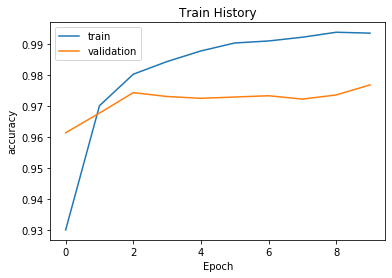

In [18]:
show_train_history(train_history,'accuracy','val_accuracy')

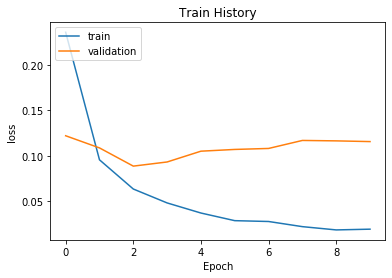

In [19]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


accuracy= 0.9783
